**Logistic Regression**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

# I want my data frame to only show two decimal places for the number, so I change the display format:
pd.options.display.float_format = "{:,.2f}".format

In [ ]:
df= pd.read_csv("/content/Heart Attack.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [ ]:
# Let's import libraries we will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X=df.drop('output',axis=1).values    
y=df['output'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_yhat = LR.predict(X_test)
LR_yhat[0:5]

array([1, 0, 1, 1, 1])

In [ ]:
LR_yhat_prob = LR.predict_proba(X_test)
LR_yhat_prob[0:5]

array([[0.24, 0.76],
       [0.69, 0.31],
       [0.39, 0.61],
       [0.12, 0.88],
       [0.36, 0.64]])

In [ ]:
from sklearn import metrics

LR_Score = metrics.accuracy_score(y_test, LR_yhat) 
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Logistic Regression's Accuracy: ", LR_Score*100,"%")

Train set Accuracy:  0.7644628099173554
Logistic Regression's Accuracy:  81.9672131147541 %


Confusion matrix, without normalization
[[34  2]
 [ 9 16]]


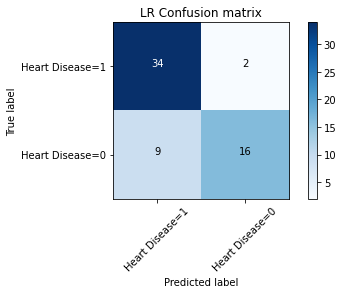

In [ ]:
# Compute confusion matrix
LR_cnf_matrix = confusion_matrix(y_test, LR_yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(LR_cnf_matrix, classes=['Heart Disease=1','Heart Disease=0'],normalize= False,  title='LR Confusion matrix')

In [ ]:
print (metrics.classification_report(y_test, LR_yhat))
LR_Recall = metrics.recall_score(y_test, LR_yhat)
LR_F1Score = metrics.f1_score(y_test, LR_yhat)
print("\nLogistic Regression's Accuracy: ", LR_Score*100,"%")

              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.79      0.94      0.86        36

    accuracy                           0.82        61
   macro avg       0.84      0.79      0.80        61
weighted avg       0.83      0.82      0.81        61


Logistic Regression's Accuracy:  81.9672131147541 %


 **Logistic Regression's Accuracy:  81.9672131147541 %**